<a href="https://colab.research.google.com/github/BabakDavarmanesh/Learning_MachineLearning/blob/withoutnote/Machine_Learning_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkblue'>Data Cleaning</font>

In most real-world scenarios, the data that data scientists work with is often raw, which means it may include duplicates, missing values, and irrelevant information. If this data is directly used for machine learning tasks, it can lead to poor accuracy or inaccurate predictions. Therefore, data cleaning—also referred to as data cleansing—is a crucial step that should be performed before any model development.

In this notebook, we will explore some common data cleaning techniques that data scientists typically use to preprocess and prepare their data for analysis.

## Objectives

*   Use Log function to transform the data
*   Handle the duplicates
*   Handle the missing values
*   Standardize and normalize the data
*   Handle the outliers


# **<font color='orange'>Import the required libraries</font>**


In [3]:
!pip install pandas numpy seaborn matplotlib scikit-learn scipy

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In this tutorial, we will be using the Ames_Housing_Data.tsv file, which you can download from [Kaggle](https://www.kaggle.com/datasets/hamzajabbarkhan/ames-housingtsv)

# **<font color='orange'>Exploring and making sense of our data</font>**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

housing = pd.read_csv("/content/drive/My Drive/dataset/AmesHousing.tsv", sep='\t')  # Adjust path if needed
housing.head() # Default: Shows first 5 rows

Mounted at /content/drive


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We can find more information about the features and types using the `info()`  method.

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

The dataset comprises 2,930 entries, indexed from 0 to 2,929, each characterized by 81 attributes.

The "Non-Null Count" column indicates the number of entries without missing values; if this count is 2,930 for a particular attribute, it signifies the absence of missing data for that attribute.

'SalePrice' serves as our target variable, while the remaining attributes act as predictor variables. The dataset contains a combination of numerical data types, with 28 columns of type int64 and 11 of type float64, as well as object data types.

In [6]:
housing["SalePrice"].describe()

,SalePrice
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


​In this section, we'll explore the describe() function in pandas. This function provides a quick overview of the statistical properties of numerical data, which is essential for understanding the distribution and central tendencies of our target variable.​

Using `describe()` on 'SalePrice'

By applying `housing["SalePrice"].describe()`, we obtain the following statistics:​

- count: Total number of non-null entries.​

- mean: Average value of 'SalePrice'.​

- std: Standard deviation, indicating the variability around the mean.​

- min: Minimum value in the 'SalePrice' column.​

- 25%: First quartile (25th percentile), below which 25% of the data fall.​

- 50%: Median (50th percentile), the middle value separating the higher half from the lower half.​

- 75%: Third quartile (75th percentile), below which 75% of the data fall.​

- max: Maximum value in the 'SalePrice' column.​

These metrics collectively offer insights into the central tendency, spread, and range of housing sale prices in our dataset.

The `.value_counts()` command in pandas is used to count the occurrences of unique values in a particular column (or series). It returns a sorted count of unique values in descending order.

In [17]:
housing["Sale Condition"].value_counts()

,count
Sale Condition,
Normal,2413
Partial,245
Abnorml,190
Family,46
Alloca,24
AdjLand,12


In [38]:
hous_num = housing.select_dtypes(include = ['float64', 'int64'])
hous_num_corr = hous_num.corr()['SalePrice'][:-1] # -1 means that the latest row is SalePrice
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 12 strongly correlated values with SalePrice:
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
Name: SalePrice, dtype: float64


In [30]:
len(hous_num.columns)

39

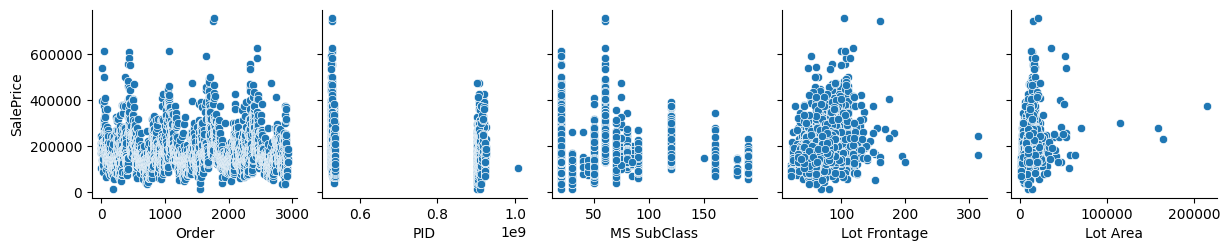

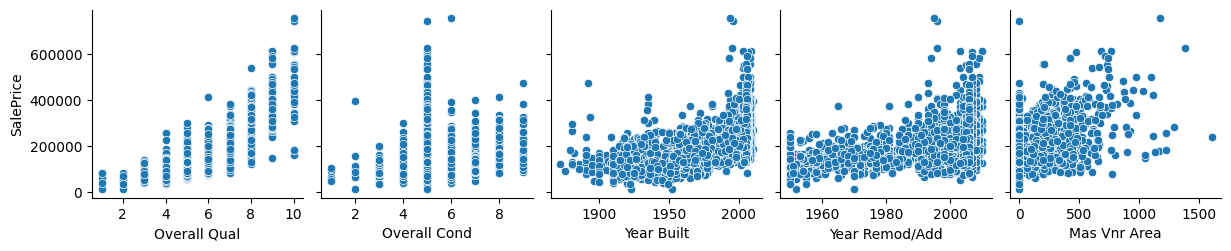

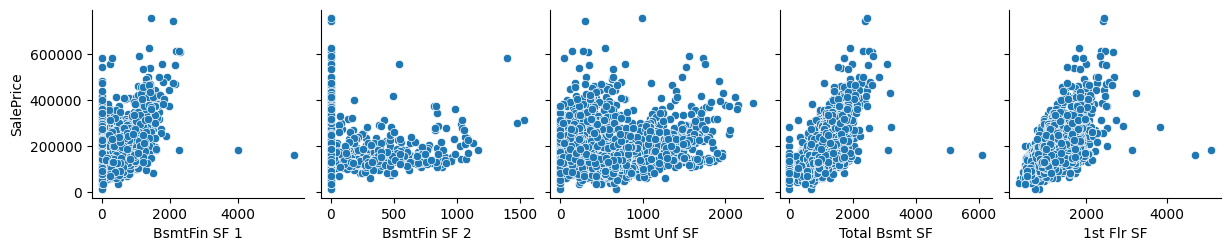

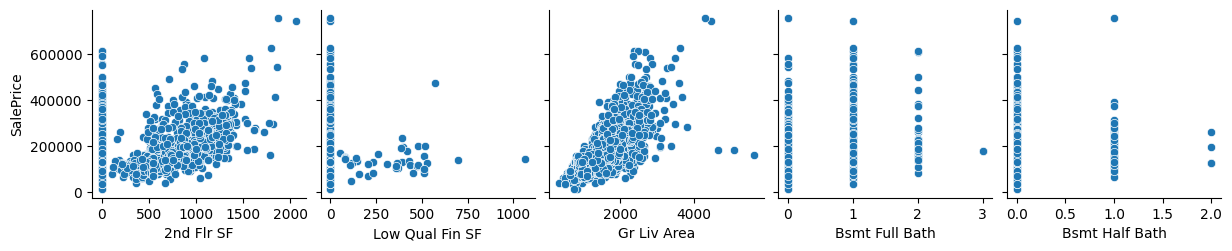

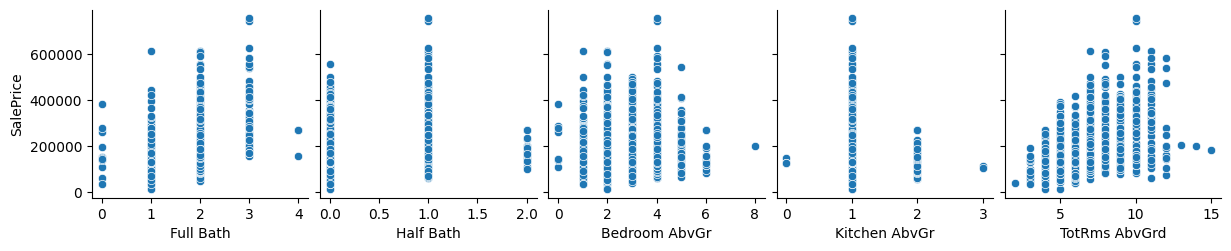

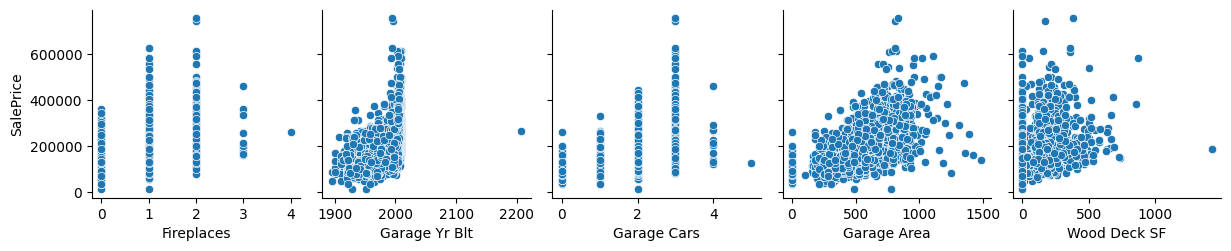

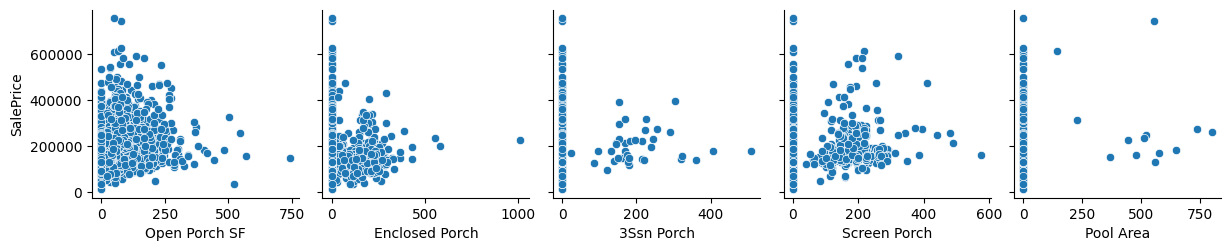

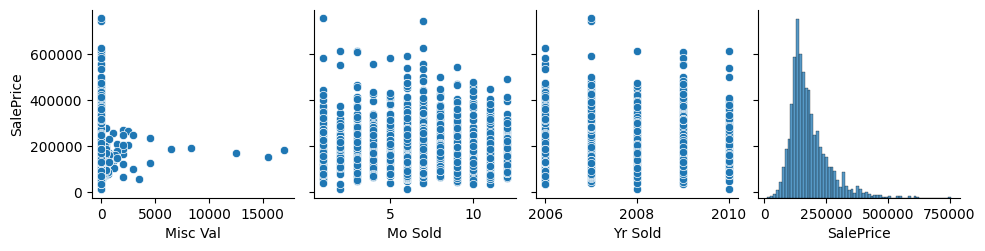

In [40]:
for i in range(0, len(hous_num.columns), 5):
    sns.pairplot(data=hous_num,
                x_vars=hous_num.columns[i:i+5],
                y_vars=['SalePrice'])

<ipython-input-41-ac7f3aa7eb87>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed = sns.distplot(housing['SalePrice'])


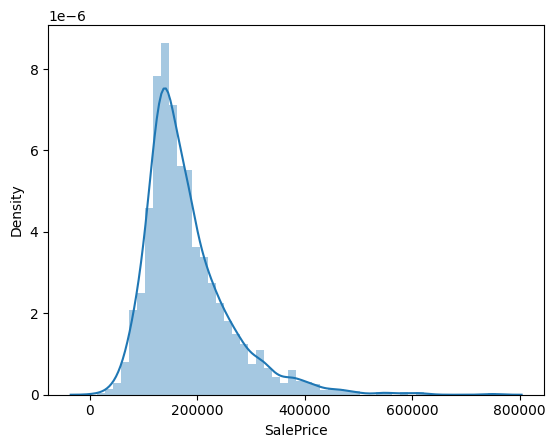

In [41]:
sp_untransformed = sns.distplot(housing['SalePrice'])

In [42]:
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 1.743500


In [43]:
log_transformed = np.log(housing['SalePrice'])

<ipython-input-44-518cb346cd69>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_transformed = sns.distplot(log_transformed)


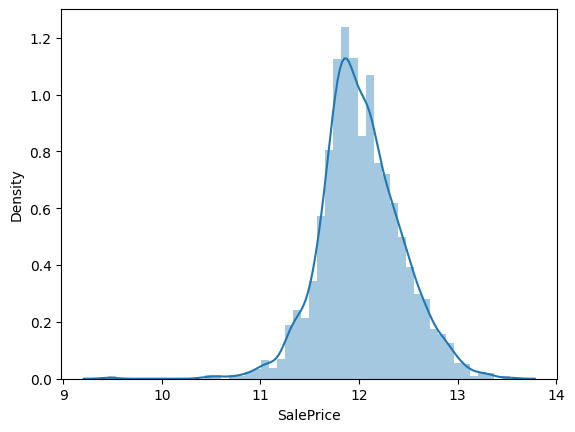

In [44]:
sp_transformed = sns.distplot(log_transformed)

In [45]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.014793


<ipython-input-48-55a846117fc7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  la_plot = sns.distplot(housing['Lot Area'])


Skewness: 12.820898
Skewness: -0.498861


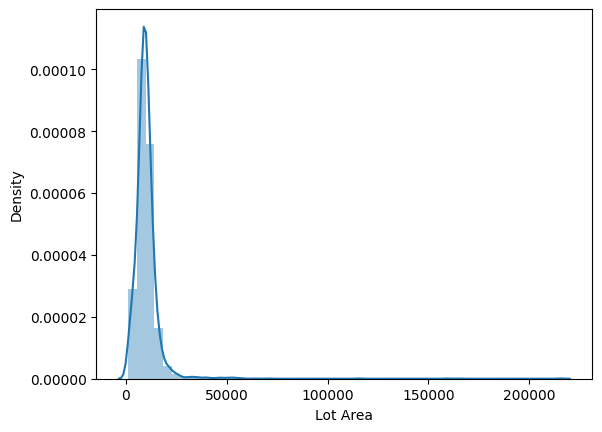

In [48]:
la_plot = sns.distplot(housing['Lot Area'])
print("Skewness: %f" % housing['Lot Area'].skew())
la_log = np.log(housing['Lot Area'])
print("Skewness: %f" % la_log.skew())


<ipython-input-49-5717625f1e72>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  la_plot = sns.distplot(la_log)


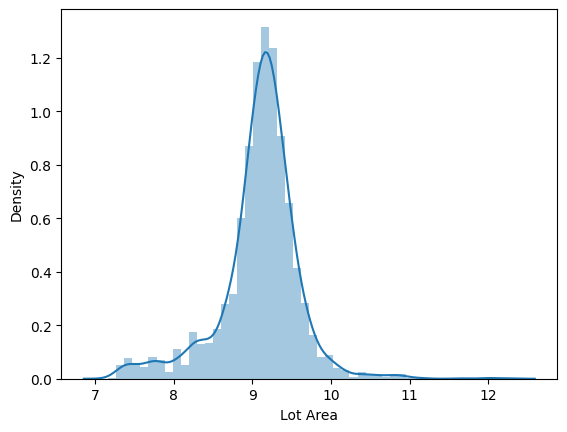

In [49]:
la_plot = sns.distplot(la_log)